In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().sum()

0

<AxesSubplot: xlabel='Exited'>

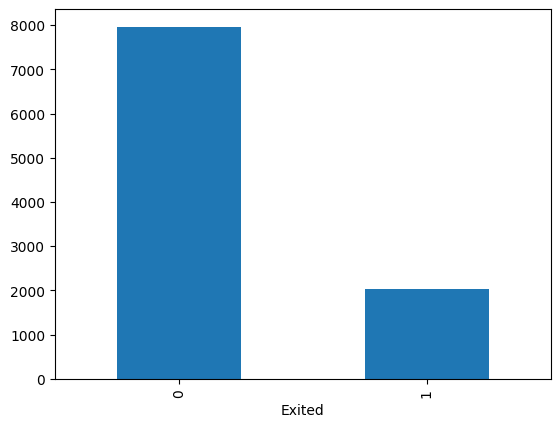

In [7]:
df['Exited'].value_counts().plot(kind='bar')

In [8]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
df['Gender']=df['Gender'].replace({'Male': 1, 'Female': 0})

C:\Users\chira\AppData\Local\Temp\ipykernel_27220\1499552968.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace({'Male': 1, 'Female': 0})


In [14]:
df['Geography'] = df['Geography'].map({'France': 0, 'Spain': 1, 'Germany': 2})

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [16]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape


(8000, 10)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train

array([[ 0.35649971, -0.90598864,  0.91324755, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.20389777,  1.50315516,  0.91324755, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.96147213,  0.29858326,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.86500853, -0.90598864, -1.09499335, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 0.15932282, -0.90598864,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.47065475,  1.50315516,  0.91324755, ...,  0.64920267,
         0.97481699, -0.81456811]])

In [24]:
import tensorflow as tf

In [25]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [26]:
model = Sequential()
model.add(Dense(16,activation='relu',input_dim=10)) # hidden layer 1
model.add(Dense(8,activation='relu')) # hidden layer 2
model.add(Dense(1,activation='sigmoid')) # output layer

In [27]:
#total trainable parameters = (input_dim+1)*units in the layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
output=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.8698 - val_loss: 0.3273 - val_accuracy: 0.8575
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.3177 - accuracy: 0.8683 - val_loss: 0.3271 - val_accuracy: 0.8569
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.3173 - accuracy: 0.8683 - val_loss: 0.3278 - val_accuracy: 0.8594
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.3165 - accuracy: 0.8675 - val_loss: 0.3295 - val_accuracy: 0.8594
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8691 - val_loss: 0.3288 - val_accuracy: 0.8587
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8681 - val_loss: 0.3296 - val_accuracy: 0.8587
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8681 - val_loss: 0.3298 - val_accuracy: 0.8562
Epoch 

In [33]:
model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


array([[0.07135393],
       [0.0290499 ],
       [0.11296417],
       ...,
       [0.7539695 ],
       [0.11902143],
       [0.3273415 ]], dtype=float32)

In [34]:
model.layers[0].get_weights()

[array([[-0.8414631 , -0.13462241, -0.10276309, -0.69382894, -0.06521289,
         -0.09905634, -0.1019857 , -0.09716321, -0.07242993,  0.34016854,
          0.056279  , -0.01558238, -0.26660365, -0.43751544, -0.08335359,
          0.04447263],
        [-0.9531677 ,  0.1905202 , -0.33366662,  0.44560066, -0.28657466,
          0.6483835 , -0.687381  ,  0.1689403 , -0.32098952,  0.11746033,
         -0.20536266,  0.00766506, -0.58194447, -0.06296199,  0.4381117 ,
         -0.07073088],
        [ 0.2538552 ,  0.05706401, -0.09600572, -0.1094901 ,  0.06334136,
         -0.34550822, -0.36191234, -0.30323356,  0.32274818,  0.16997603,
          0.05499359, -0.02457857, -0.24810517,  0.02753312,  0.32530802,
          0.03634035],
        [ 0.3265006 , -0.35951924,  0.42283297, -0.1654135 , -0.08981772,
          0.01747249,  0.4317483 , -0.77537966, -0.5586933 , -0.69617623,
         -0.88828087, -0.16656089, -0.42304975,  0.7814188 ,  0.11217514,
         -0.7411121 ],
        [-0.09864222

In [35]:
model.layers[1].get_weights()

[array([[ 3.22314084e-01,  1.01461746e-02, -7.56005466e-01,
          4.84158725e-01, -2.03300759e-01,  5.40425479e-02,
          1.73385262e-01,  1.66701719e-01],
        [ 2.87305921e-01, -9.12575126e-01,  1.76898494e-01,
          4.23303321e-02, -5.36985040e-01,  3.15443844e-01,
          3.65188390e-01,  4.01278168e-01],
        [-3.55384409e-01,  8.80299628e-01, -2.73970187e-01,
          1.99712679e-01,  4.24354710e-02, -1.37854785e-01,
          4.47118461e-01, -1.01358004e-01],
        [ 2.33690470e-01,  4.19873148e-02,  6.01701379e-01,
          5.78147531e-01,  4.17997509e-01,  1.25653848e-01,
          6.16673470e-01, -1.40497133e-01],
        [-6.09289467e-01, -4.81003582e-01,  4.52492684e-01,
          3.27365339e-01, -7.20912516e-01,  2.43224263e-01,
         -3.27943087e-01,  2.78142750e-01],
        [-5.36306500e-01, -3.88093203e-01, -6.00134015e-01,
         -3.86717021e-02, -5.03750682e-01,  2.74167687e-01,
         -3.18413109e-01,  3.91069114e-01],
        [-1.9070

In [36]:
model.layers[2].get_weights()

[array([[-0.2715756],
        [-0.8129681],
        [ 1.160303 ],
        [ 1.3549913],
        [-0.8393994],
        [ 1.2705401],
        [-0.497007 ],
        [ 0.7744528]], dtype=float32),
 array([-0.24099071], dtype=float32)]

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=(model.predict(X_test)>0.5).astype("int32")
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

63/63 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.71      0.46      0.56       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

[[1534   73]
 [ 212  181]]
0.8575


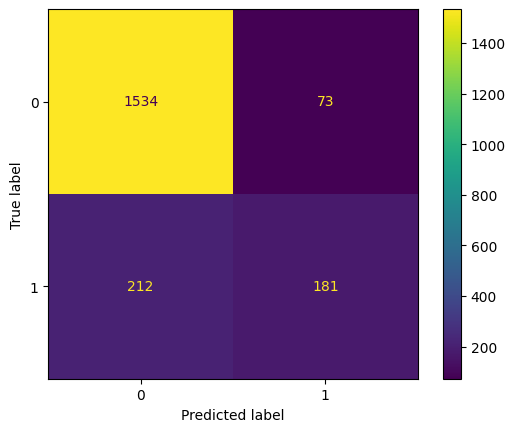

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

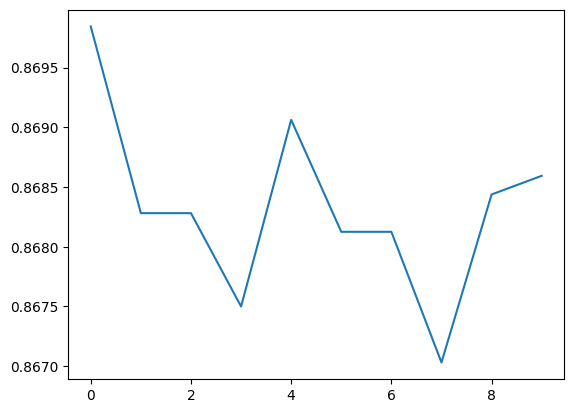

In [47]:
plt.plot(output.history['accuracy'])

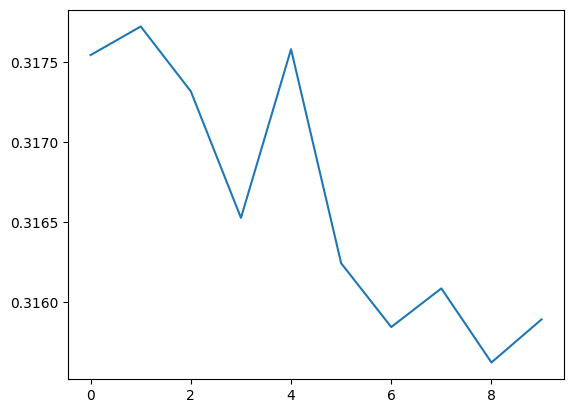

In [48]:
plt.plot(output.history['loss'])